In [9]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.offsetbox import AnchoredText

In [4]:
result = np.loadtxt('multiple_modes.txt')

In [6]:
N = 10
repeats = 10

In [16]:
np.polyfit(np.log10(SNR[wrong_bayes>0]), np.log10(wrong_bayes[wrong_bayes>0]) ,deg=1)[0]

1.66389014254865

/tmp/ipykernel_132415/2824739259.py:4: RuntimeWarning: invalid value encountered in log10
  correct_slope = np.polyfit(np.log10(SNR), np.log10(correct_bayes) ,deg=1)[0]
/tmp/ipykernel_132415/2824739259.py:5: RuntimeWarning: invalid value encountered in log10
  wrong_slope = np.polyfit(np.log10(SNR), np.log10(wrong_bayes) ,deg=1)[0]


Text(0.5, 1.0, 'Correct bayes')

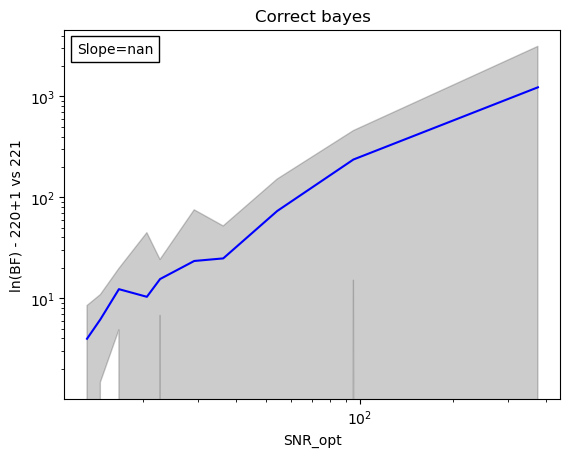

In [10]:
SNR = result[:,0]
correct_bayes = result[:,1]
wrong_bayes = result[:,2]
correct_slope = np.polyfit(np.log10(SNR), np.log10(correct_bayes) ,deg=1)[0]
wrong_slope = np.polyfit(np.log10(SNR), np.log10(wrong_bayes) ,deg=1)[0]

median_SNR = np.median(np.reshape(SNR, (N, repeats)), axis=1)
std_SNR = np.std(np.reshape(SNR, (N, repeats)), axis=1)
median_correct = np.median(np.reshape(correct_bayes, (N, repeats)), axis=1)
std_correct = np.std(np.reshape(correct_bayes, (N, repeats)), axis=1)
median_wrong = np.median(np.reshape(wrong_bayes, (N, repeats)), axis=1)
std_wrong = np.std(np.reshape(wrong_bayes, (N, repeats)), axis=1)

fig, ax = pl.subplots(1,1)
# ax.loglog(SNR, bayes, 'o', alpha = 0.4)
ax.loglog(median_SNR, median_correct, color='b')
ax.fill_between(median_SNR, median_correct-std_correct, median_correct+std_correct, color='k', alpha=0.2)
ax.set_xlabel('SNR_opt')
ax.set_ylabel(r'ln(BF) - 220+1 vs 221')
anchored_text = AnchoredText("Slope=%.2f" % correct_slope, loc=2)
ax.add_artist(anchored_text)
ax.set_title("Correct bayes")
# pl.savefig(home_dir+'multiple_modes_correct.png')
# pl.close()


Text(0.5, 1.0, 'Wrong bayes')

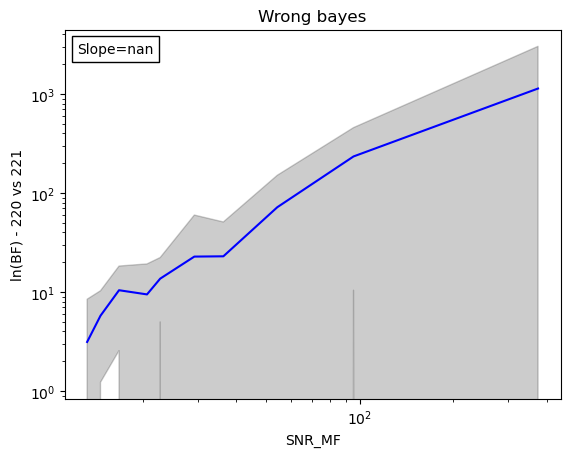

In [11]:

fig, ax = pl.subplots(1,1)
# ax.loglog(SNR, bayes, 'o', alpha = 0.4)
ax.loglog(median_SNR, median_wrong, color='b')
ax.fill_between(median_SNR, median_wrong-std_wrong, median_wrong+std_wrong, color='k', alpha=0.2)
ax.set_xlabel('SNR_MF')
ax.set_ylabel(r'ln(BF) - 220 vs 221')
anchored_text = AnchoredText("Slope=%.2f" % wrong_slope, loc=2)
ax.add_artist(anchored_text)
ax.set_title("Wrong bayes")
